In [1]:
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib

In [2]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/modelo_SH_SY5Y_100_75_50_25_2022-12-15.h5')
modelo_maior_erro

In [3]:
#179 IMAGENS SEPARADAS RANDOMICAMENTE - 10%

X_test_maior_erro = joblib.load('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/imagens_validação_10%_SH_SY5Y_2022-12-15.gz') #carregando arquivo
X_test_maior_erro.shape

(116, 200, 200, 3)

In [4]:
#179 RÓTULOS

y_test_maior_erro = joblib.load('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/rótulos_validação_10%_SH_SY5Y_2022-12-15.gz') #carregando arquivo
y_test_maior_erro.shape

(116,)

In [5]:
#ROTULOS SALVOS EM LISTA

lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

116

In [6]:
#PREDIÇÃO SALVO EM LISTA

dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

4/4 [==============================] - 3s 610ms/step


116

In [7]:
import pandas as pd
from scipy.stats.stats import pearsonr as stats

In [8]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO

df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.head()

,Observed values,Lista preditos
0,462,540.377258
1,556,644.226807
2,797,743.964478
3,612,747.077393
4,929,835.651733


In [9]:
#ARREDONDANDO O PREDITO ('lista preditos')

teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Predicted values'] = teste
df_maior_erro.head()

,Observed values,Lista preditos,Predicted values
0,462,540.377258,540.38
1,556,644.226807,644.23
2,797,743.964478,743.96
3,612,747.077393,747.08
4,929,835.651733,835.65


In [10]:
#REORGANIZANDO AS COLUNAS

df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,462,540.38,540.377258
1,556,644.23,644.226807
2,797,743.96,743.964478
3,612,747.08,747.077393
4,929,835.65,835.651733


In [11]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação

In [12]:
#CALCULO DE CORRELAÇÃO

col1_obt = 0 #Observed value
col2_prev = 1 #Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])

<Figure size 1080x1080 with 0 Axes>

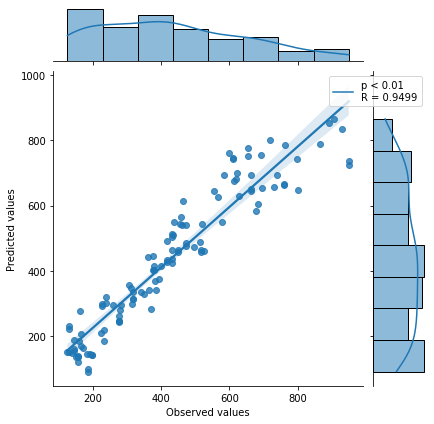

In [13]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro#[df_maior_erro['Lista observado'] > 300]
)

if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r